In [2]:
import json
data = 0
with open('C:\\Users\\mechadmin\\Desktop\superformula_dataset\\cpw-S2-n.json') as f:
    data = json.load(f)



In [79]:
d = data['save_20000']
cp = d['control_points']
we = d['weights']
import ast
import numpy as np
def parse_str(s):
    # Step 1: Split the string by '|'
    parts = s.split('|')

    # Step 2: Use ast.literal_eval to convert each part to a list
    arrays = [np.array(ast.literal_eval(part)) for part in parts]

    return arrays

cpts = parse_str(cp)
weights = parse_str(we)

In [78]:
len(cpts)

1200

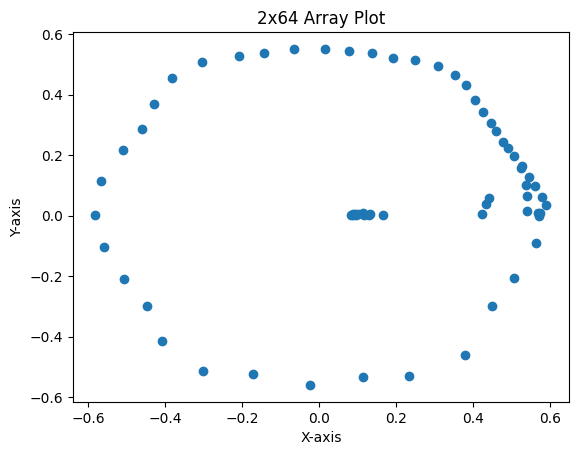

In [82]:
import numpy as np
import matplotlib.pyplot as plt
cpt = np.array(cpts[300])
weight = np.array(weights[300])

# Plot the data
plt.scatter(cpt[0], cpt[1])

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('2x64 Array Plot')

# Show the plot
plt.show()

In [69]:
cpt

array([[ 7.49780834e-01,  5.74905813e-01,  1.93397477e-01,
         1.59710154e-01,  1.36250377e-01,  1.17929123e-01,
         1.09175161e-01,  1.02475837e-01,  1.04290769e-01,
         1.08946234e-01,  1.19882561e-01,  1.35623276e-01,
         1.56427041e-01,  7.76818633e-01,  7.12494671e-01,
         5.53705096e-01,  5.65080643e-01,  7.61649191e-01,
         7.11603403e-01,  7.36299634e-01,  6.92499876e-01,
         7.04336464e-01,  6.55056238e-01,  6.70846343e-01,
         6.31146669e-01,  6.07178688e-01,  5.94843149e-01,
         5.62779486e-01,  5.29740095e-01,  5.11157334e-01,
         4.85122651e-01,  4.31550980e-01,  3.93490881e-01,
         3.28821659e-01,  2.61173487e-01,  2.06683099e-01,
         1.42519414e-01,  1.06870785e-01, -1.86771378e-02,
        -6.15370609e-02, -1.72694281e-01, -2.20731199e-01,
        -3.36365402e-01, -4.24999058e-01, -5.24076641e-01,
        -5.34969926e-01, -6.28571033e-01, -7.26602912e-01,
        -7.68793941e-01, -7.21728683e-01, -6.21633530e-0

In [72]:
last_10_keys = list(data.keys())[-100:]
print(last_10_keys)

['save_10100', 'save_10200', 'save_10300', 'save_10400', 'save_10500', 'save_10600', 'save_10700', 'save_10800', 'save_10900', 'save_11000', 'save_11100', 'save_11200', 'save_11300', 'save_11400', 'save_11500', 'save_11600', 'save_11700', 'save_11800', 'save_11900', 'save_12000', 'save_12100', 'save_12200', 'save_12300', 'save_12400', 'save_12500', 'save_12600', 'save_12700', 'save_12800', 'save_12900', 'save_13000', 'save_13100', 'save_13200', 'save_13300', 'save_13400', 'save_13500', 'save_13600', 'save_13700', 'save_13800', 'save_13900', 'save_14000', 'save_14100', 'save_14200', 'save_14300', 'save_14400', 'save_14500', 'save_14600', 'save_14700', 'save_14800', 'save_14900', 'save_15000', 'save_15100', 'save_15200', 'save_15300', 'save_15400', 'save_15500', 'save_15600', 'save_15700', 'save_15800', 'save_15900', 'save_16000', 'save_16100', 'save_16200', 'save_16300', 'save_16400', 'save_16500', 'save_16600', 'save_16700', 'save_16800', 'save_16900', 'save_17000', 'save_17100', 'save

In [73]:
for i in last_10_keys:
    d = data[i]
    cp = d['control_points']
    we = d['weights']
    cpts = parse_str(cp)
    weights = parse_str(we)
    for j in range(20):
        cpt = np.array(cpts[j])
        weight = np.array(weights[j])
        cor = False
        for k in range(len(cpt[0])):
            if 0 <= cpt[0][k] < 0.1 and 0 <= cpt[1][k] < 0.1:
                cor = True
        if not cor:
            print(i)
            print(j)                                     
    

save_10100
0
save_10100
1
save_10100
2
save_10100
3
save_10100
4
save_10100
5
save_10100
6
save_10100
7
save_10100
8
save_10100
9
save_10100
10
save_10100
11
save_10100
12
save_10100
13
save_10100
14
save_10100
16
save_10100
17
save_10100
18
save_10100
19
save_10200
0
save_10200
1
save_10200
2
save_10200
3
save_10200
4
save_10200
5
save_10200
6
save_10200
7
save_10200
8
save_10200
9
save_10200
10
save_10200
11
save_10200
12
save_10200
13
save_10200
14
save_10200
15
save_10200
16
save_10200
17
save_10200
18
save_10200
19
save_10300
0
save_10300
1
save_10300
2
save_10300
3
save_10300
4
save_10300
5
save_10300
6
save_10300
7
save_10300
8
save_10300
9
save_10300
10
save_10300
11
save_10300
12
save_10300
14
save_10300
15
save_10300
16
save_10300
17
save_10300
18
save_10300
19
save_10400
0
save_10400
1
save_10400
2
save_10400
3
save_10400
4
save_10400
5
save_10400
6
save_10400
7
save_10400
8
save_10400
9
save_10400
10
save_10400
11
save_10400
12
save_10400
14
save_10400
15
save_10400
16
save

KeyboardInterrupt: 